In [1]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()
#os.environ['OpenAI_API_Key'] = os.getenv('OpenAI_API_Key')

True

In [29]:
#os.getenv('OpenAI_API_Key')

In [4]:
llm = OpenAI(api_token=os.getenv('OpenAI_API_Key'))

In [30]:
#os.getenv('filepath')

In [6]:
df1=pd.read_csv(os.getenv('filepath'))
df1.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [7]:
df2=pd.read_csv(os.getenv('sales_filepath'),encoding='unicode_escape')
df2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
pandas_ai = PandasAI(llm, conversational=False)
pandas_ai(df2, prompt='Which are the top 5 City with highest sales and what are their sales value?')

'Madrid : 1082551.44\nSan Rafael : 654858.06\nNYC : 560787.77\nSingapore : 288488.41\nParis : 268944.68\n'

In [9]:
pandas_ai = PandasAI(llm, conversational=False)
pandas_ai(df1, prompt='Which department has highest employee churn?what is its churn percentage')

'   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects   \n0              221  engineering              NaN         0.932868           4  \\\n1              232      support              NaN              NaN           3   \n2              184        sales              NaN         0.788830           3   \n3              206        sales              NaN         0.575688           4   \n4              249        sales              NaN         0.845217           3   \n\n   recently_promoted  salary  satisfaction    status  tenure  \n0                NaN     low      0.829896      Left     5.0  \n1                NaN     low      0.834544  Employed     2.0  \n2                NaN  medium      0.834988  Employed     3.0  \n3                NaN     low      0.424764  Employed     2.0  \n4                NaN     low      0.779043  Employed     3.0  \nThe department with the highest churn is finance\nThe churn percentage for this department is 26.785714285714285\n'

In [10]:
pandas_ai(df1, prompt='What is the total number of employee?')

'Total number of employees: 14249\n'

In [11]:
pandas_ai(df1, prompt='What is the total number of employee in finance department with status left?')

"<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 14249 entries, 0 to 14248\nData columns (total 10 columns):\n #   Column             Non-Null Count  Dtype  \n---  ------             --------------  -----  \n 0   avg_monthly_hrs    14249 non-null  int64  \n 1   department         13540 non-null  object \n 2   filed_complaint    2058 non-null   float64\n 3   last_evaluation    12717 non-null  float64\n 4   n_projects         14249 non-null  int64  \n 5   recently_promoted  300 non-null    float64\n 6   salary             14249 non-null  object \n 7   satisfaction       14068 non-null  float64\n 8   status             14249 non-null  object \n 9   tenure             14068 non-null  float64\ndtypes: float64(5), int64(2), object(3)\nmemory usage: 1.1+ MB\nNone\nTotal number of employees in finance department with status left: 195\n"

In [12]:
pandas_ai(df1, prompt='What is the total number of employee in finance department?')

'Total number of employees in finance department: 728\n'

In [13]:
195/728

0.26785714285714285

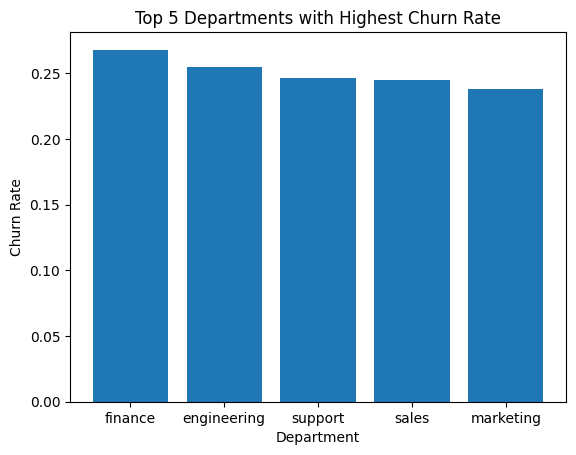

'department\nfinance        0.267857\nengineering    0.255015\nsupport        0.246466\nsales          0.244711\nmarketing      0.238095\nName: status, dtype: float64\n'

In [14]:
pandas_ai(df1, prompt='Create bar plot for top 5 deparment with highest churn rate along with displaying data')

In [25]:
df1[(df1['status']=='Left') & (df1['department']=='sales')].shape[0]

960

In [26]:
def churn_rate(department):
    num = df1[(df1['status']=='Left') & (df1['department']==department)].shape[0]
    den = df1[df1['department']==department].shape[0]
    if den == 0:
        churn = "dep na"
    else:
        churn = num/den
    return churn

In [27]:
dep = df1.department.unique().tolist()
dep[0], len(dep)

('engineering', 13)

In [28]:
for i in range(0,len(dep)-1):
    print(dep[i],churn_rate(dep[i]))

engineering 0.2550154320987654
support 0.24646559849198868
sales 0.2447106806015804
IT 0.2248062015503876
product 0.21976744186046512
marketing 0.23809523809523808
temp 0.13812154696132597
procurement 0.09195402298850575
finance 0.26785714285714285
nan dep na
management 0.146218487394958
information_technology 0.18660287081339713
